In [1]:
from keras import optimizers
from keras.models import Sequential ,load_model
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten, Reshape, Lambda
from keras.callbacks import ModelCheckpoint, TensorBoard
from sklearn import preprocessing 
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import os
import skimage.io
import PIL.Image
import cv2

Using TensorFlow backend.


In [2]:
# Load data X
filename = os.path.join("data/", "{}.npy".format("X_train2"))
X_train = np.load(filename)

# Load data X
filename = os.path.join("data/", "{}.npy".format("X_test2"))
X_test = np.load(filename)

# Load data Y
filename = os.path.join("data/", "{}.npy".format("Y_train2"))
Y_train = np.load(filename)

# Load data Y
filename = os.path.join("data/", "{}.npy".format("Y_test2"))
Y_test = np.load(filename)

In [3]:
# Input shape
input_shape = X_train.shape[1:]
print(input_shape)
#input_shape = (70,100,3)

(66, 200, 3)


In [5]:
def createModel():
    model = Sequential()
    model.add(Lambda(lambda x: x/127.5 -1.0, input_shape=input_shape)) # normaliza las imagenes de entrada
    model.add(Conv2D(24, (5, 5), activation='relu', strides=(1,1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    #98  31
    model.add(Conv2D(36, (5, 5), activation='relu', strides=(1,1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    #47  14
    model.add(Conv2D(48, (5, 5), activation='relu', strides=(1,1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    #model.add(Dropout(0.25))
    #22  6
    model.add(Conv2D(64, (3, 3), activation='relu', strides=(1,1)))
    #model.add(MaxPooling2D(pool_size=(2, 2)))
    #model.add(Dropout(0.25))
    #
    model.add(Conv2D(64, (3, 3), activation='relu', strides=(1,1)))
    #model.add(MaxPooling2D(pool_size=(2, 2)))
    #model.add(Dropout(0.25))
 
    model.add(Flatten())
    model.add(Dense(1164, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(100, activation='relu'))
    #model.add(Dropout(0.25))
    model.add(Dense(50, activation='relu'))
    #model.add(Dropout(0.25))
    model.add(Dense(10, activation='relu'))
    #model.add(Dense(1, activation='tanh'))
    model.add(Dense(1))
    return model
def createModel2():
    model = Sequential()
    model.add(Lambda(lambda x: x/127.5 -1.0, input_shape=input_shape)) # normaliza las imagenes de entrada
    model.add(Conv2D(24, (5, 5), activation='relu', strides=(2,2)))
    model.add(Dropout(0.25))
    #98  31
    model.add(Conv2D(36, (5, 5), activation='relu', strides=(2,2)))
    model.add(Dropout(0.25))
    #47  14
    model.add(Conv2D(48, (5, 5), activation='relu', strides=(2,2)))
    model.add(Dropout(0.25))
    #22  6
    model.add(Conv2D(64, (3, 3), activation='relu', strides=(1,1)))
    #model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    #
    model.add(Conv2D(64, (3, 3), activation='relu', strides=(1,1)))
    #model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
 
    model.add(Flatten())
    model.add(Dense(1164, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(100, activation='relu'))
    #model.add(Dropout(0.25))
    model.add(Dense(50, activation='relu'))
    #model.add(Dropout(0.25))
    model.add(Dense(10, activation='relu'))
    #model.add(Dense(1, activation='tanh'))
    model.add(Dense(1))
    return model

In [6]:
# Compile model
#opt = optimizers.Nadam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, schedule_decay=0.004)
#opt = optimizers.Adamax(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0)
#opt = optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0) ###
#opt = optimizers.SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False)
opt = optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
#opt = optimizers.Adagrad(lr=0.01, epsilon=None, decay=0.0)
#opt = optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
model1 = createModel2()
model1.compile(optimizer=opt, loss='mean_squared_error')
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_1 (Lambda)            (None, 66, 200, 3)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 31, 98, 24)        1824      
_________________________________________________________________
dropout_1 (Dropout)          (None, 31, 98, 24)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 47, 36)        21636     
_________________________________________________________________
dropout_2 (Dropout)          (None, 14, 47, 36)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 5, 22, 48)         43248     
_________________________________________________________________
dropout_3 (Dropout)          (None, 5, 22, 48)         0         
__________

## Entrenamiento

In [ ]:
checkP = ModelCheckpoint('backup/check_model35.{epoch:02d}-{loss:.5f}-{val_loss:.5f}.h5', monitor='val_loss', verbose=1, save_best_only=False, save_weights_only=False, mode='auto', period=50)
tensorB = TensorBoard(log_dir='tb/', histogram_freq=50, batch_size=32, write_graph=True, write_grads=False, write_images=True, embeddings_freq=0, embeddings_layer_names=None, embeddings_metadata=None)
#initial_epoch
batch_size = 4096
epochs = 2000
history = model1.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, shuffle=True, verbose=1,initial_epoch=1024,
                   validation_data=(X_test, Y_test),callbacks = [checkP, tensorB])
 
#model1.evaluate(X_test, Y_test)
#project_id = 'scarecrow'
#!gsutil cp -r backup gs://{bucket_name}/content

## Rendimiento del Entrenamiento

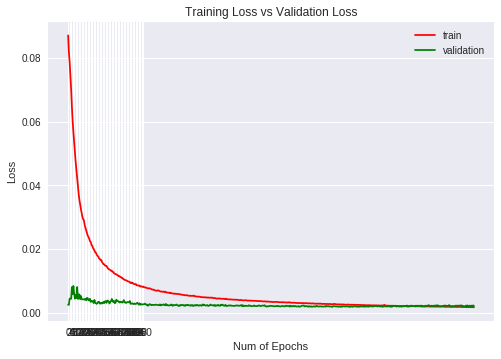

In [0]:
plt.figure(0)

 
plt.figure(1)
plt.plot(history.history['loss'],'r')
plt.plot(history.history['val_loss'],'g')
plt.xticks(np.arange(0, 101, 2.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Validation Loss")
plt.legend(['train','validation'])
 
 
plt.show()

In [0]:
model1.evaluate(X_test, Y_test)

# Cargar el modelo desde una dirección

In [4]:
model1 = load_model('backup/check_model35.700-0.00220-1.18745.h5')

In [6]:
model1.evaluate(X_test, Y_test)

2000/2000 [==============================] - 0s 165us/step


0.837549681079574

In [9]:
n = 35000
x_p = model1.predict(np.expand_dims(X_train[n],axis=0))
y_real= Y_train[n]
print('Resultados Ypred = {} y Yreal = {}'.format(x_p,y_real))

Resultados Ypred = [[-0.02386391]] y Yreal = -0.05164319


# Probar con una imagen externa

(70, 90, 3)
Resultados Ypred = [[-0.34018645]]


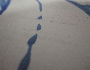

In [0]:
temp = skimage.io.imread('center2.jpg')

temp = cv2.resize(temp[:,:,:],(int(90), int(70)))
temp = cv2.flip( temp, 1 )
print(temp.shape)
x_p = model1.predict(np.expand_dims(temp[:,:,0:3],axis=0))
print('Resultados Ypred = {}'.format(x_p))
PIL.Image.fromarray(temp[:,:,0:3])

In [0]:
import keras as k
k.__version__

'2.2.4'

In [10]:
!nvidia-smi

Wed Nov 21 22:14:11 2018       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 396.44                 Driver Version: 396.44                    |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P0    36W / 300W |      0MiB / 16160MiB |      1%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  